In [1]:
import os
import timm
import torch
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from timm.data.dataset import ImageDataset
from timm.data.loader import create_loader
from timm.data import IterableImageDataset
from timm.data import create_dataset
from timm.data.readers.reader_image_folder import ReaderImageFolder
from timm.data.transforms_factory import create_transform 
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

model = timm.create_model("vit_base_resnet50d_224", num_classes=20, exportable=True)
checkpoint = torch.load("output/train/20221103-211801-vit_base_resnet50d_224-224/model_best.pth.tar")

model.load_state_dict(checkpoint["state_dict"])
model.default_cfg


{'url': '',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': None,
 'crop_pct': 0.9,
 'interpolation': 'bicubic',
 'fixed_input_size': True,
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'patch_embed.backbone.conv1.0',
 'classifier': 'head',
 'architecture': 'vit_base_resnet50d_224'}

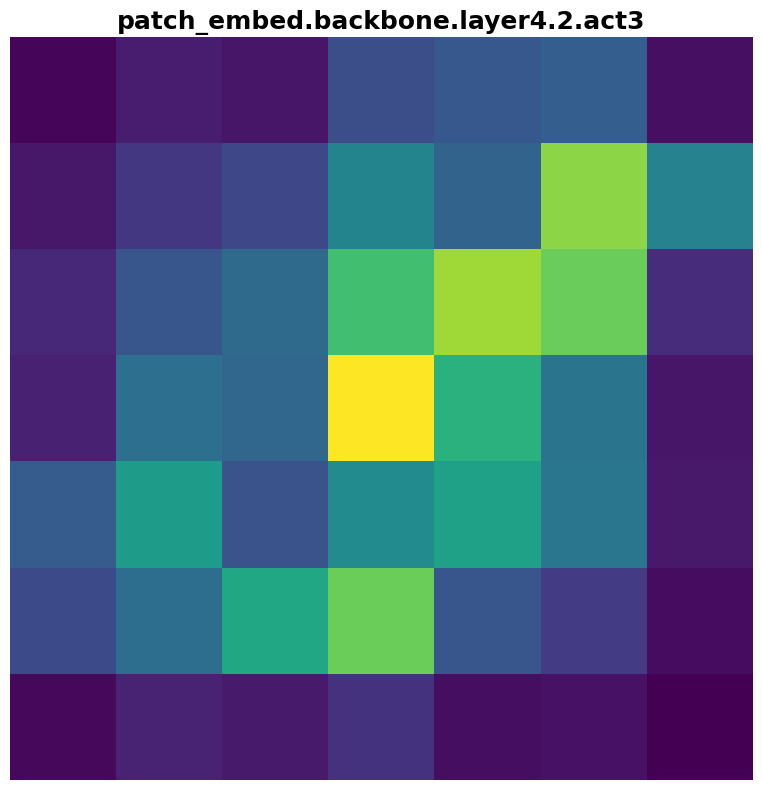

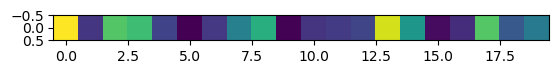

In [2]:
ret_path = Path("mured_single/val/MYA")
ret_image_paths = list(ret_path.iterdir())

image = Image.open(ret_image_paths[4])
image = image.resize((224, 224))
image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2, 0)[None]

nodes, _ = get_graph_node_names(model)
nodes

feature_extractor = create_feature_extractor(model, return_nodes=nodes)
out = feature_extractor(image)

px = 1/plt.rcParams["figure.dpi"]
fig = figure(figsize=(800*px, 800*px))
plt.imshow(out["patch_embed.backbone.layer4.2.act3"][0].transpose(0, 2).sum(-1).detach().numpy())
plt.title("patch_embed.backbone.layer4.2.act3", fontsize=18, fontweight="bold")
plt.axis("off")
plt.tight_layout()            
# plt.savefig("feature_imgs/" + str(i), bbox_inches="tight")
plt.show()

plt.imshow(out["head"].detach().numpy())
plt.show()

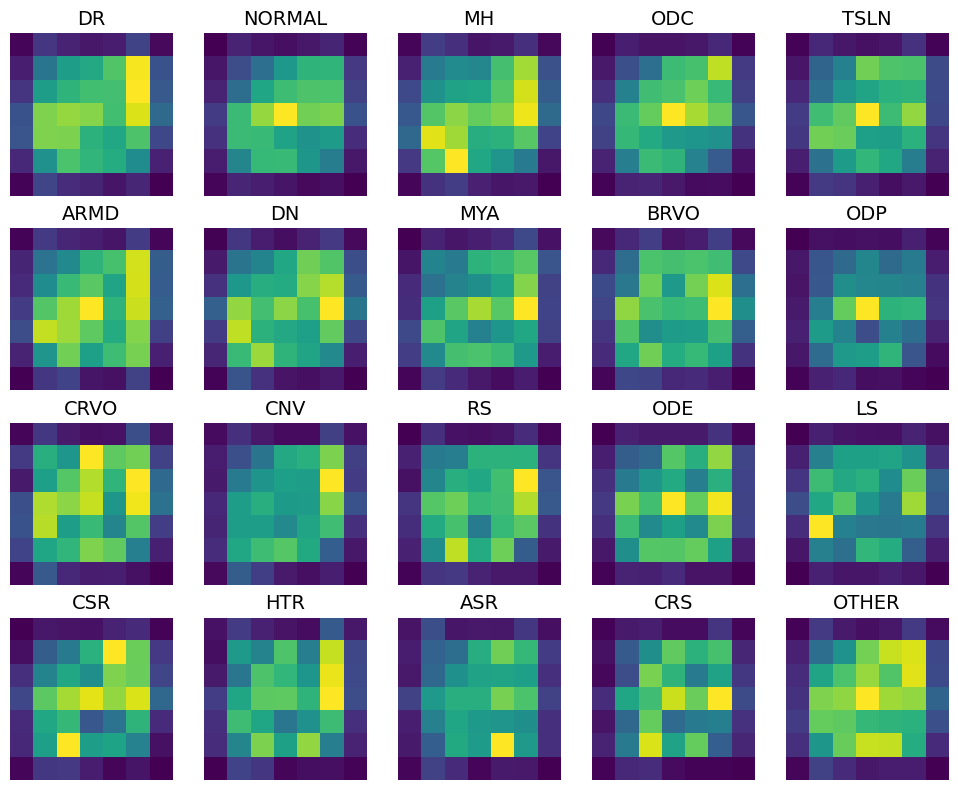

In [14]:
nodes, _ = get_graph_node_names(model)
nodes
feature_extractor = create_feature_extractor(model, return_nodes=nodes)

root = "mured_single/val/"
paths_str = ["DR", "NORMAL", "MH", "ODC", "TSLN", 
             "ARMD", "DN", "MYA", "BRVO", "ODP", 
             "CRVO", "CNV", "RS", "ODE", "LS", 
             "CSR", "HTR", "ASR", "CRS", "OTHER"]
paths = [list(Path(root + cat).iterdir()) for cat in paths_str]
paths

agg_arrs = {}

fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for i, (name, cat) in enumerate(zip(paths_str, paths)):
    cat_arr = np.empty((7, 7))
    for img in cat:
        image = Image.open(img)
        image = image.resize((224, 224))
        image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2, 0)[None]

        out = feature_extractor(image)
        
        layer_result = out["patch_embed.backbone.layer4.2.act3"][0].transpose(0, 2).sum(-1).detach().numpy()
        cat_arr = np.dstack((cat_arr, layer_result))
    
    agg_arrs[name] = cat_arr.mean(axis=2)

    axes[i // 5, i % 5].imshow(agg_arrs[name])
    axes[i // 5, i % 5].set_title(name, fontsize=14, loc="center")
    axes[i // 5, i % 5].axis("off")
    
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)
plt.savefig("augment_imgs/class_features.png", bbox_inches="tight")
plt.show()

# plt.imshow(out["head"].detach().numpy())
# plt.show()

In [ ]:
# full feed forward images
for i, l in enumerate(out):
    if isinstance(out[l], torch.Tensor) and isinstance(out[l][0], torch.Tensor):
        if out[l].dim() == 4:
            px = 1/plt.rcParams["figure.dpi"]
            fig = figure(figsize=(800*px, 800*px))
            plt.imshow(out[l][0].transpose(0, 2).sum(-1).detach().numpy())
            plt.title(l, fontsize=18, fontweight="bold")
            plt.axis("off")
            plt.tight_layout()            
            # plt.savefig("feature_imgs/" + str(i), bbox_inches="tight")
            plt.show()

In [17]:
nodes

['x',
 'patch_embed.backbone.conv1.0',
 'patch_embed.backbone.conv1.1',
 'patch_embed.backbone.conv1.2',
 'patch_embed.backbone.conv1.3',
 'patch_embed.backbone.conv1.4',
 'patch_embed.backbone.conv1.5',
 'patch_embed.backbone.conv1.6',
 'patch_embed.backbone.bn1',
 'patch_embed.backbone.act1',
 'patch_embed.backbone.maxpool',
 'patch_embed.backbone.layer1.0.conv1',
 'patch_embed.backbone.layer1.0.bn1',
 'patch_embed.backbone.layer1.0.act1',
 'patch_embed.backbone.layer1.0.conv2',
 'patch_embed.backbone.layer1.0.bn2',
 'patch_embed.backbone.layer1.0.drop_block',
 'patch_embed.backbone.layer1.0.act2',
 'patch_embed.backbone.layer1.0.aa',
 'patch_embed.backbone.layer1.0.conv3',
 'patch_embed.backbone.layer1.0.bn3',
 'patch_embed.backbone.layer1.0.downsample.0',
 'patch_embed.backbone.layer1.0.downsample.1',
 'patch_embed.backbone.layer1.0.downsample.2',
 'patch_embed.backbone.layer1.0.add',
 'patch_embed.backbone.layer1.0.act3',
 'patch_embed.backbone.layer1.1.conv1',
 'patch_embed.backb

In [2]:
import timm
timm.list_models('*resnet*')

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'eca_resnet33ts',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'ens_adv_inception_resnet_v2',
 'gcresnet33ts',
 'gcresnet50t',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resnet101_v1b',
 'gluon_resnet101_v1c',
 'gluon_resnet101_v1d',
 'gluon_resnet101_v1s',
 'gluon_resnet152_v1b',
 'gluon_resnet152_v1c',
 'gluon_resnet152_v1d',
 'gluon_resnet152_v1s',
 'inception_resnet_v2',
 'lambda_resnet26rpt_256',
 'lambda_resnet26t',
 'lambda_resnet50ts',
 'legacy_seresnet18',
 'legacy_seresnet34',
 'legacy_seresnet50',
 'legacy_seresnet101',
 'legacy_seresnet152',
 'nf_ecaresnet26',
 'nf_ecaresnet50',
 'nf_ecaresnet101',
 'nf_resnet26',
 'nf_resnet50',
 'nf_resnet101',
 'nf_seresnet26',
 'nf_seresnet50',
 'nf_seresnet1